<b> Map attempt with CESM2 Data </b> 

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr
import pandas as pd

In [2]:
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0)

In [3]:
# Function used to create the map subplots
def plot_background(ax):
    ax.set_extent([200., 260., -10., 60.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    return ax

In [4]:
# Open observation Precipitation
dir = '/chinook/dallmann/SOARS/'
fn = 'tos_Omon_CESM2_omip2_r1i1p1f1_gn_030601-036612_anom.nc'

data_tos = xr.open_dataset(dir+fn)

In [5]:
# Change the time to be from DatetimeNoLeap to a Datetime64
data_tos['time'] = np.arange('1958-01-01','2019-01-01',dtype = 'datetime64[M]')
data_tos

<xarray.Dataset>
Dimensions:    (bnds: 2, nlat: 384, nlon: 320, time: 732, vertices: 4)
Coordinates:
    lon        (nlat, nlon) float64 ...
    lat        (nlat, nlon) float64 ...
  * time       (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2018-12-01
Dimensions without coordinates: bnds, nlat, nlon, vertices
Data variables:
    lon_bnds   (nlat, nlon, vertices) float64 ...
    lat_bnds   (nlat, nlon, vertices) float64 ...
    time_bnds  (time, bnds) object ...
    tos        (time, nlat, nlon) float32 ...
Attributes: (12/45)
    CDI:                    Climate Data Interface version 1.7.2 (http://mpim...
    history:                Tue Jun 08 14:39:51 2021: cdo ymonsub tos_Omon_CE...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            OMIP
    ...                     ...
    variable_id:            tos
    variant_info:           CMIP6 omip2 experiment (JRA forcing) with interac...
    variant_label:          r1i1p1f1
    source_type:            OGCM BGC
    comment:                Experiment run for 6 cycles of 1958-2018 JRA55 fo...
    CDO:                    Climate Data Operators version 1.7.2 (http://mpim...

In [6]:
#data_tos = data_tos.mean('time')

In [7]:
# define surface temperature variable
tos = data_tos['tos']

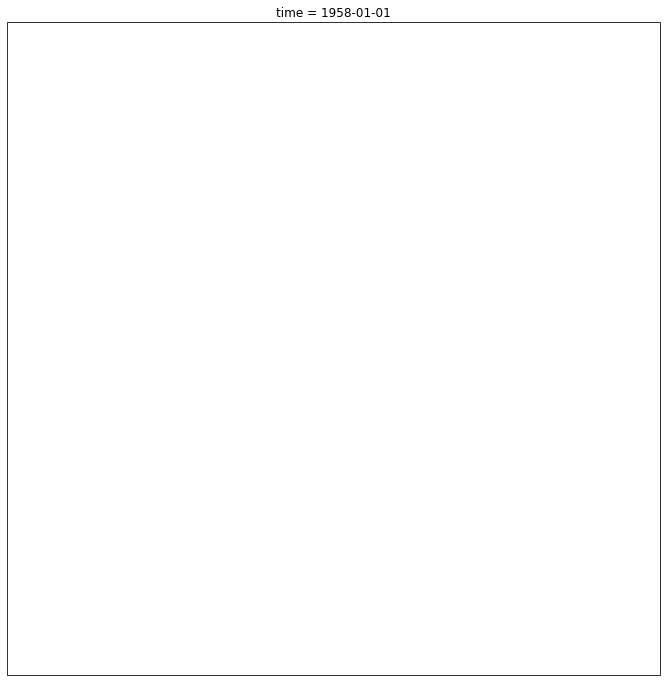

In [8]:
# Create a figure object
tos = tos.isel(time=0)

# Use a GeoCAT-viz function to fix the artifact of not-shown-data around 0 and 360-degree longitudes
#t = gvutil.xr_add_cyclic_longitudes(t, "lon")

# Create a figure object and generate axes
fig = plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.Mercator())

# Add features to the projection
#ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black', linewidth=0.2, zorder=3)

states = cfeature.NaturalEarthFeature(category='cultural',
                                     name='admin_1_states_provinces_shp',
                                     scale='50m',
                                     facecolor='none',
                                     edgecolor='black',
                                     linewidth=0.2)


# Note: This is the same process as turning your projection argument into a variable and calling it later. This may
# not be the most time saving practice for this example, but if this feature were being reused multiple times in a
# single code, this method would come in handy.

# Add coastlines to the projection and define resolution based on resolution previously used
ax.coastlines('50m')
#ax.add_features(states)

# Add filled dew point temperature contours
tos.plot.contourf(ax=ax,
                     transform=ccrs.PlateCarree(),
                     levels=12,
                     cmap='RdBu', # Another best practice color scheme
                     add_colorbar=False)

# Zoom into a specific area on the map 


# Add another feature to your map 